### Embedding Generation
#### Objective: Represent textual data (e.g., employee profiles, hobbies) as numerical vectors for similarity analysis.

Scenario: Generate embeddings for employee profiles using a pre-trained model (e.g., SentenceTransformers).

Steps:

Use SentenceTransformers to generate embeddings for employee profiles or specific fields like Role, Department, and Hobbies.
Store embeddings in a vector database like FAISS or Pinecone for efficient similarity searches.

In [3]:
from sentence_transformers import SentenceTransformer
import numpy as np

model = SentenceTransformer('all-MiniLM-L6-v2')


In [5]:
employee_profiles = [
    "Priya Sharma: Operations Manager, Reading, Traveling",
    "Rohit Mehra: Logistics Analyst, Chess, Photography",
    "Anjali Das: HR Executive, Cooking, Gardening",
    "Karan Kapoor: Fleet Supervisor, Cricket, Hiking",
    "Sunita Patil: Finance Executive, Painting, Running",
    "Neha Malhotra: Junior Analyst, Singing, Blogging",
    "Amit Verma: CEO, Golf, Reading",
    "Rajesh Kulkarni: CTO, Traveling, Painting",
    "Meera Iyer: Marketing Manager, Writing, Yoga",
    "Aditya Jain: Senior Developer, Coding, Chess",
]

In [6]:
embeddings = model.encode(employee_profiles)

In [7]:
type(embeddings)

numpy.ndarray

In [8]:
len(embeddings)

10

In [13]:
len(embeddings[1])

384

### Similarity Search 
#### Objective: Find similar employees based on role, hobbies, or departments.

Scenario 1: Find employees with similar hobbies. Scenario 2: Identify mentors for employees by comparing profiles.

Steps:

Use FAISS or Pinecone for similarity searches on embeddings.
Query the database with a specific employee’s embedding to find the top-k similar employees.

In [16]:
import faiss

# Index embeddings using FAISS (L2 Distance)
index = faiss.IndexFlatL2(embeddings.shape[1])
index.add(np.array(embeddings))

# Query: Find employees similar to "Priya Sharma"
query_profile = "Karan Kapoor: Fleet Supervisor, Cricket, Hiking"
query_embedding = model.encode([query_profile])[0]

# Search the index for top 3 similar employees
D, I = index.search(np.array([query_embedding]), k=3)  # Top-3 matches
print("Top similar employees to Karan Kapoor:")
for idx in I[0]:
    print(f"- {employee_profiles[idx]}")

Top similar employees to Karan Kapoor:
- Karan Kapoor: Fleet Supervisor, Cricket, Hiking
- Priya Sharma: Operations Manager, Reading, Traveling
- Rohit Mehra: Logistics Analyst, Chess, Photography


### Visualizing Embeddings Using t-SNE

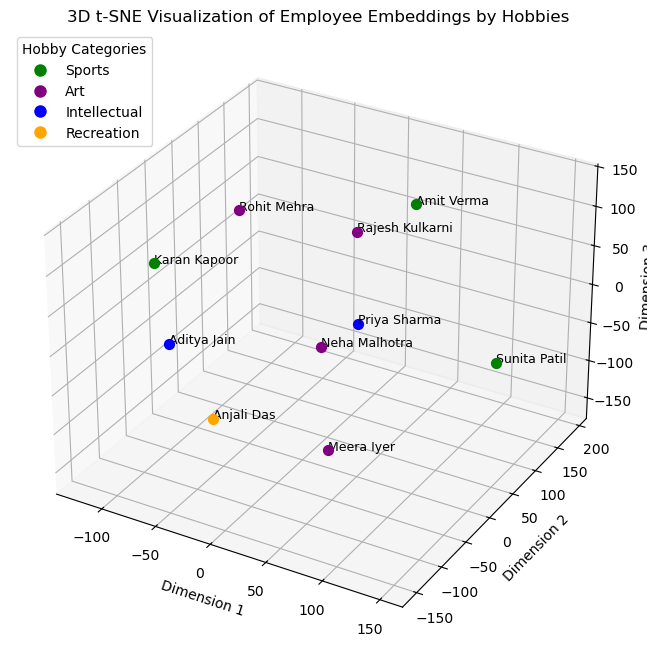

In [29]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# High-dimensional embeddings (example: 10 employees with 512 dimensions)
embeddings = np.random.rand(10, 512)

# Employee information for visualization
employee_names = [
    "Priya Sharma", "Rohit Mehra", "Anjali Das",
    "Karan Kapoor", "Sunita Patil", "Neha Malhotra",
    "Amit Verma", "Rajesh Kulkarni", "Meera Iyer", "Aditya Jain"
]
employee_hobbies = [
    "Reading, Traveling", "Chess, Photography", "Cooking, Gardening",
    "Cricket, Hiking", "Painting, Running", "Singing, Blogging",
    "Golf, Reading", "Traveling, Painting", "Writing, Yoga", "Coding, Chess"
]

# Categorize hobbies (grouping similar ones together)
hobby_categories = {
    "Sports": ["Cricket", "Hiking", "Running", "Golf"],
    "Art": ["Painting", "Blogging", "Photography", "Writing"],
    "Intellectual": ["Reading", "Chess", "Coding"],
    "Recreation": ["Traveling", "Yoga", "Cooking", "Gardening"]
}

# Assign a category to each employee based on hobbies
employee_hobby_category = []
for hobbies in employee_hobbies:
    for category, keywords in hobby_categories.items():
        if any(hobby in hobbies for hobby in keywords):
            employee_hobby_category.append(category)
            break

# Map hobby categories to colors
hobby_colors = {
    "Sports": "green",
    "Art": "purple",
    "Intellectual": "blue",
    "Recreation": "orange"
}
colors = [hobby_colors[category] for category in employee_hobby_category]

# Step 1: Apply t-SNE to reduce embeddings to 3D
perplexity = min(len(embeddings) - 1, 30)  # Ensure perplexity < n_samples
tsne = TSNE(n_components=3, perplexity=perplexity, random_state=42)
embeddings_3d = tsne.fit_transform(embeddings)

# Step 2: Plot the 3D t-SNE results with color coding
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the embeddings with colors
for i in range(len(embeddings_3d)):
    ax.scatter(
        embeddings_3d[i, 0], embeddings_3d[i, 1], embeddings_3d[i, 2],
        color=colors[i], s=50, label=employee_hobby_category[i] if i == 0 else ""
    )
    ax.text(
        embeddings_3d[i, 0], embeddings_3d[i, 1], embeddings_3d[i, 2],
        employee_names[i], fontsize=9
    )

# Add legend for hobby categories
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10)
           for color in hobby_colors.values()]
labels = hobby_colors.keys()
ax.legend(handles, labels, title="Hobby Categories", loc="upper left")

# Set axis labels and title
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
ax.set_zlabel("Dimension 3")
ax.set_title("3D t-SNE Visualization of Employee Embeddings by Hobbies")

plt.show()


### Advanced Similarity Queries


In [30]:
# Query: Find similar employees for "Aditya Jain"
query = "Aditya Jain: Senior Developer, Coding, Chess"
query_embedding = model.encode([query])[0]
D, I = index.search(np.array([query_embedding]), k=3)

print("Top similar employees to Aditya Jain:")
for idx in I[0]:
    print(f"- {employee_profiles[idx]}")

Top similar employees to Aditya Jain:
- Aditya Jain: Senior Developer, Coding, Chess
- Rohit Mehra: Logistics Analyst, Chess, Photography
- Anjali Das: HR Executive, Cooking, Gardening


In [31]:
# Query: Mentor for "Neha Malhotra"
query = "Neha Malhotra: Junior Analyst, Singing, Blogging"
query_embedding = model.encode([query])[0]
D, I = index.search(np.array([query_embedding]), k=3)

print("Suggested mentors for Neha Malhotra:")
for idx in I[0][1:]:  # Exclude Neha herself
    print(f"- {employee_profiles[idx]}")


Suggested mentors for Neha Malhotra:
- Meera Iyer: Marketing Manager, Writing, Yoga
- Anjali Das: HR Executive, Cooking, Gardening
